<a href="https://colab.research.google.com/github/randiijulian/Zenius-ML/blob/main/Day11%2612HW_Randi_Julian_Saputra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Day 11 & 12 Assignment

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Uni Life's/ML Zenius/Day 12/housepricesdata.csv")

Penjelasan:
1. Unit_Name: Nama Unit Apartmen
2. No_Rooms: Jumlah bedrooms
3. Bathroom: Jumlah kamar mandi
4. Locality: Daerah
5. Region: Kota/Kabupaten
6. Longitude dan Latitude: letak geografis
7. Furnished: 1 jika fully furnished, 0 jika non-furnished
8. Area: Luas
9. Tower: Lokasi Tower
10. Total_Facilities: Jumlah Total Fasilitas
11. Currency: Mata Uang (USD/IDR)
12. Annual_Price: Harga sewa tahunan (sesuai mata uang)

### Soal:

1. Perhatikan kolom 'Currency' dan 'Annual_Price'. Buatlah kolom baru bernama `CleanedPrice`. Kolom ini dibuat berdasarkan informasi dari 'Annual_Price' dan 'Currency', sehingga harga sewa tahunan di `CleanedPrice` memiliki mata uang yang sama, yaitu IDR (Rupiah). Gunakan Asumsi 1 USD = 15 000 IDR.
2. Analisalah kolom 'No_Rooms' dan 'CleanedPrice'. Apakah ada kejanggalan? Jika ya, nyatakanlah apa yang membuat data-data tersebut janggal. Kemudian, perbaikilah (jika hal tersebut dapat dilakukan). Jika Anda tidak memilih untuk memperbaikinya, maka apa yang sebaiknya dilakukan pada baris-baris tersebut? 
3. Apartemen di Kota/Kabupaten mana yang memiliki rata-rata harga paling tinggi? Buatlah visualisasi untuk mendukung klaim Anda. 
4. Analisalah kolom 'Longitude' dan 'Latitude'. Apakah ada kejanggalan? Jika ya, nyatakanlah apa yang membuat data-data tersebut janggal. Ada kejanggalan yang ***bisa dijelaskan***, sehingga data tersebut meskipun janggal tapi sah-sah saja, dan ada pula kejanggalan yang ***salah***, sehingga data tersebut harus diperbaiki. Kejanggalan tipe apa yang muncul di kolom 'Longitude' dan 'Latitude'? Bila kejanggalan tersebut bisa dijelaskan, maka jelaskanlah. Bila kejanggalan tersebut merupakan sebuah kesalahan, maka coba perbaikilah. 

#### Nomor 1:

In [4]:
def currency_change(cur, val):
    if cur == 'USD':
        return val * 15000
    else:
        return val

In [5]:
df['CleanedPrice'] = np.vectorize(currency_change)(df['Currency'], df['Annual_Price'])

#### Nomor 2:

In [6]:
df.groupby(['No_Rooms'])['CleanedPrice'].mean().reset_index().sort_values('CleanedPrice', ascending = False)

,No_Rooms,CleanedPrice
6,6,1.000000e+09
0,0,7.768541e+08
5,5,7.328000e+08
4,4,4.405861e+08
3,3,2.248974e+08
2,2,1.030487e+08
1,1,8.502813e+07


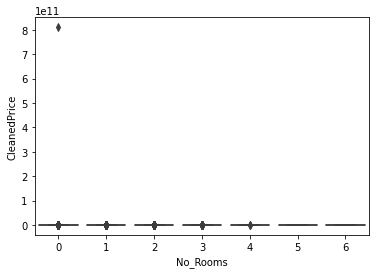

In [7]:
fig = plt.figure()
sns.boxplot(data = df, x = 'No_Rooms', y = 'CleanedPrice')
plt.show()

Terlihat bahwa:
- Rata-rata harga sewa tahunan apartemen dengan jumlah kamar 0 melampaui rata-rata harga sewa tahunan apartemen dengan jumlah kamar 5, 4, 3, 2, dan 1. 
- Setelah divisualisasikan, terdapat outlier pada harga sewa tahunan apartemen-apartemen dengan `No_Rooms` = 0. 

In [8]:
df[df['No_Rooms'] == 0].sort_values('CleanedPrice', ascending = False).head(5)

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
1163,Signature Park Grande Studio Fully Furnished,0,1,MT Haryono,Jakarta Timur,106.866201,-6.245201,1,25.0,Tower Green Signature,20,USD,54000000,810000000000
647,Puri Park View Apartment Studio Fully Furnished,0,1,Kebon Jeruk,Jakarta Barat,106.756061,-6.192081,1,24.0,Tower BB,21,IDR,250000000,250000000
1388,Senayan Apartment Studio Fully Furnished,0,1,Kebayoran Lama,Jakarta Selatan,106.794400,-6.218500,1,48.0,Tower 1,15,IDR,228000000,228000000
5105,Soho Pancoran Apartment Studio Semi Furnished,0,2,Pancoran,Jakarta Selatan,106.845254,-6.242801,0,102.0,Tower splendor,20,IDR,220000000,220000000
3880,Kemang Village Apartment Studio Fully Furnished,0,1,Kemang,Jakarta Selatan,106.811453,-6.259374,1,43.0,Tower Intercon,21,USD,14400,216000000


Hal ini diakibatkan karena adanya sebuah unit apartemen yang memiliki `Annual_Price` 54000000 dan `Currency` USD. Jadi, raw data menuliskan bahwa apartemen studio ini memiliki harga 54 juta dollar USA. Hal ini sangat tidak mungkin terjadi. Berdasarkan harga-harga unit apartemen lainnya, sepertinya hal ini terjadi karena kesalahan penulisan `Currency`. Seharusnya, `Currency` dari unit tersebut adalah `IDR` dan bukan `USD`. 

In [9]:
### Perbaikan
df.iloc[1163,13] = 54000000

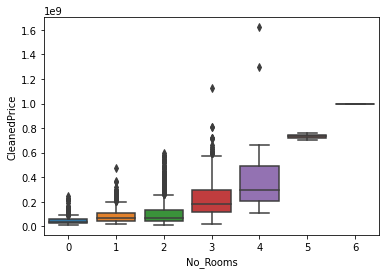

In [10]:
fig = plt.figure()
sns.boxplot(data = df, x = 'No_Rooms', y = 'CleanedPrice')
plt.show()

Setelah diperbaiki, maka distribusi harga apartemen berdasarkan `No_Rooms` lebih masuk akal. 

#### Nomor 3:

In [11]:
df.groupby(['Region'])['CleanedPrice'].mean().reset_index().sort_values(['CleanedPrice'], ascending = False)

,Region,CleanedPrice
7,Jakarta Selatan,1.758484e+08
6,Jakarta Pusat,1.057522e+08
5,Jakarta Barat,7.317143e+07
1,Batam,7.200000e+07
0,Bandung,6.551515e+07
9,Jakarta Utara,6.139668e+07
10,Jogjakarta,6.000000e+07
12,Makassar,6.000000e+07
3,Bogor,5.833333e+07
8,Jakarta Timur,5.038338e+07


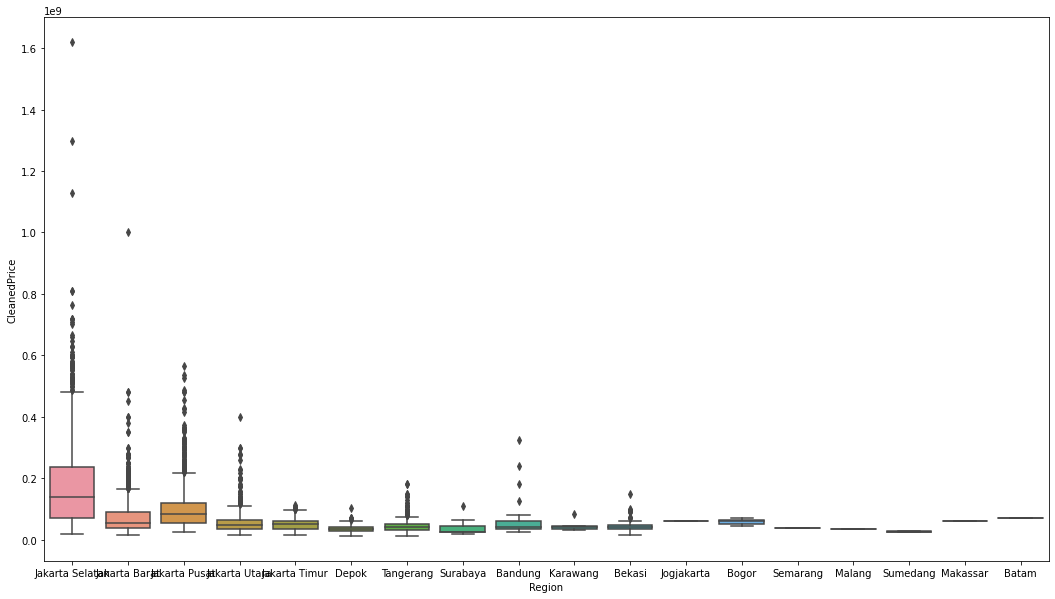

In [12]:
fig = plt.figure(figsize = (18,10))
sns.boxplot(data = df, x = 'Region', y = 'CleanedPrice')
plt.show()

Apartemen di Jakarta Selatan memiliki rata-rata harga sewa tahunan yang tertinggi. 

#### Nomor 4:

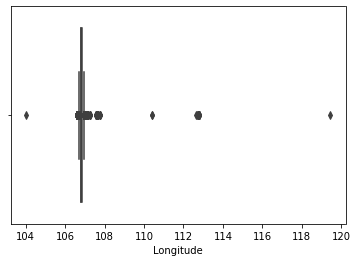

In [13]:
sns.boxplot(data = df, x = 'Longitude')
plt.show()

Untuk kolom `Longitude`, terdapat beberapa unit apartment yang memiliki nilai longitude 'outlier'. Mayoritas memiliki `Longitude` di sekitar 106-108. Mari kita periksa unit apartment yang memiliki `Longitude` di atas 118.

In [14]:
df[df.Longitude > 118]

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
1500,Vida View Makassar 2BR View Kolam renang garde...,2,1,Panakkukang,Makassar,119.441818,-5.15505,1,42.0,Tower Ashton,17,IDR,60000000,60000000


Ternyata, nilai `Longitude` yang janggal ini bisa dijelaskan:
- Kebanyakan apartemen dalam dataset kita berada di Jabodetabek (Longitude 106 - 108)
- Daerah lain memiliki representasi yang tidak imbang (hanya ada sedikit apartemen dari daerah lain)
- Apartemen yang memiliki nilai Longitude 'outlier' adalah apartemen-apartemen yang berada di daerah luar Jabodetabek ini
- Nilai 'outlier' pada Longitude bukan merupakan suatu kesalahan, namun sebagai suatu akibat dari minimnya representasi dari apartemen di luar Jabodetabek. 

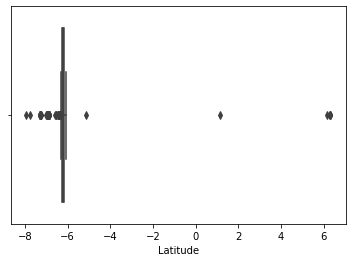

In [15]:
sns.boxplot(data = df, x = 'Latitude')
plt.show()

Terdapat beberapa nilai Latitude yang janggal pula. Mari kita lihat apartement dengan Latitude di antara 0 dan 2. 

In [16]:
df[df['Latitude'].between(0,2)]

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
1667,Nagoya Mansion Apartment Studio Tower B,0,1,Lubuk Baja,Batam,104.0149,1.1434,1,28.0,Tower B,12,IDR,72000000,72000000


Ternyata, apartemen tersebut berada di Batam. Memang, Batam memiliki Latitude 1, sehingga data ini valid. 

Bagaimana dengan apartemen dengan Latitude -7?

In [17]:
df[df['Latitude']<-7]

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
54,Puncak Kertajaya Apartment 2BR Non Furnished,2,1,Pakuwon City,Surabaya,112.787300,-7.287600,0,36.0,Tower A,11,IDR,23000000,23000000
246,Sejahtera Family Apartment 2BR Fully Furnished,2,1,Sleman,Jogjakarta,110.393900,-7.773700,1,45.0,Tower A,12,IDR,60000000,60000000
398,Twin Tower (River Peak) Studio Fully Furnished,0,1,Pakuwon City,Surabaya,112.748300,-7.251100,1,38.0,Tower A,13,IDR,50400000,50400000
456,Bale Hinggil Apartment Studio Tower A,0,1,Pakuwon City,Surabaya,112.781100,-7.309300,0,20.0,Tower A,9,IDR,20000000,20000000
733,Candiland Apartment 1BR Fully Furnished,1,1,Candisari,Semarang,110.417200,-7.000700,1,28.0,Tower 6,8,IDR,37000000,37000000
803,Soekarno Hatta Malang Apartment Studio Fully F...,0,1,Malang,Malang,112.616900,-7.949100,1,24.0,Tower 1,14,IDR,35000000,35000000
1415,Educity Residence Studio Fully Furnished,0,1,Pakuwon City,Surabaya,112.807241,-7.272173,1,21.0,Tower Yale,16,IDR,25000000,25000000
1441,Puncak Kertajaya Apartment 2BR Tower B,2,1,Pakuwon City,Surabaya,112.787300,-7.287600,1,36.0,Tower B,15,IDR,35000000,35000000
1640,Puncak Kertajaya Apartment 1BR Fully Furnished,0,1,Pakuwon City,Surabaya,112.787300,-7.287600,1,22.0,Tower A Selatan,14,IDR,25000000,25000000
1642,Twin Tower (River Peak) 2BR Fully Furnished,2,1,Pakuwon City,Surabaya,112.748300,-7.251100,1,53.0,Tower A,14,IDR,64800000,64800000


Mereka berada di Surabaya, dan memang Surabaya memiliki Latitude di bawah -7

Namun, mari kita lihat apartemen dengan Latitude 6. Hal ini sangat janggal karena wilayah Indonesia tidak ada yang mencapai Latitude 6.

In [18]:
df[df['Latitude'] > 6]

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
826,Best Western Mangga Dua Studio View City,0,1,Mangga Dua,Jakarta Pusat,106.827261,6.139958,1,33.0,Tower 1,18,IDR,48000000,48000000
951,B Residence BSD 1BR Tower lotus,0,1,BSD City,Tangerang,106.638100,6.304300,1,26.0,Tower lotus,20,IDR,40000000,40000000
1140,B Residence BSD Studio Non Furnished,0,1,BSD City,Tangerang,106.638100,6.304300,0,20.0,Tower Rose,17,IDR,40000000,40000000
2344,B Residence BSD Studio Fully Furnished,0,1,BSD City,Tangerang,106.638100,6.304300,1,25.0,Tower Tulip,20,IDR,55000000,55000000
3143,B Residence BSD Studio Furnished,0,1,BSD City,Tangerang,106.638100,6.304300,1,25.0,Tower Tulip,18,IDR,55000000,55000000
3175,B Residence BSD Studio View AEON Mall,0,1,BSD City,Tangerang,106.638100,6.304300,1,22.0,Tower Tulip,18,IDR,45000000,45000000
4469,B Residence BSD Studio Furnished,0,1,BSD City,Tangerang,106.638100,6.304300,1,26.0,Tower Tulip,19,IDR,60000000,60000000


Ternyata, apartemen-apartemen yang memiliki Latitude > 6 berada di Jabodetabek, yang seharusnya memiliki nilai Latidude ***negatif 6***. 

Berarti, untuk kolom 'Latitude':
- Apartemen dengan nilai Latitude di bawah -4 memiliki nilai Latitude yang benar, karena memang mayoritas apartemen di dataset ini berada di bawah Garis Khatulistiwa. 
- Apartemen dengan nilai Latitude antara 0 dan 2 memiliki nilai Latitude yang benar pula, meskipun janggal, karena apartemen ini berada di Batam (dan kota Batam memang meiliki Latitude 1).
- Apartemen dengan nilai Latitude di atas 6 memiliki nilai Latitude yang ***salah***, karena mereka berada di Jabodetabek, yang memiliki Latitude -6. Berarti, untuk apartemen-apartemen ini, nilai Latitude mereka harus dibuat negatif.

In [19]:
def latitude_fix(x):
    if x > 4:
        return -1 * x
    else:
        return x

In [20]:
df['Latitude'] = np.vectorize(latitude_fix)(df['Latitude'])

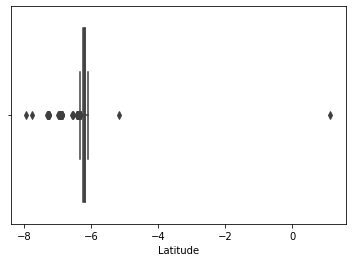

In [21]:
sns.boxplot(data = df, x = 'Latitude')
plt.show()